In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
tcga = pd.read_csv('TCGA_data.csv')
tcga.drop('cancer', axis = 1, inplace = True)
tcga = tcga.sort_index(axis=1)
tcga['y'] = tcga['y'].replace(['KIRC','KIRP','KICH'],['RC','RC','RC'])
tcga.head(1)

,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,cyto.10p13,...,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,y
0,-0.1608,0.2213,0.2213,0.2213,0.2213,0.2213,0.2213,0.2213,0.2213,0.2213,...,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,BLCA


In [4]:
urine = pd.read_csv('urine_k15_140cases.csv')
urine['y'] = urine['y'].replace(['BLCA_15k','NL_15k','PRAD_15k','RCC_100k'],['BLCA','Normal','PRAD','RC'])
urine.drop(['Unnamed: 0','X'],axis=1,inplace=True)
urine = urine.sort_index(axis=1)
urine.head(1)

,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,cyto.10p13,...,cyto.9p22.1,cyto.9p22.2,cyto.9p22.3,cyto.9p23,cyto.9p24.1,cyto.9p24.2,cyto.9p24.3,cyto.9q11,cyto.9q12,y
0,0.07148,-0.079833,-0.073905,-0.146039,-0.051357,0.013945,-0.007236,0.000625,-0.053185,-0.011618,...,-0.178345,-0.273368,-0.346382,-0.405683,-0.365723,-0.345233,-0.43504,0,0,BLCA


In [34]:
X = tcga.drop(['y'],axis=1)
lst = [i for i in urine.columns if i in X.columns]
X = tcga.loc[:,lst]
X_urine = urine.loc[:,lst]

In [35]:
urine = urine.sort_values(by='y')

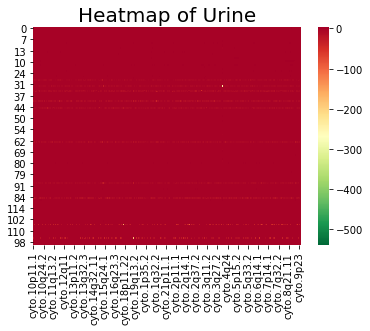

In [36]:
ax = sns.heatmap(urine.drop('y',axis=1), cmap='RdYlGn_r')
plt.title('Heatmap of Urine', fontsize=20)
plt.show() 

In [59]:
import operator
lst = list(urine.drop('y',axis=1).min())
index, value = min(enumerate(lst), key=operator.itemgetter(1))
print(index,value)
print(urine.columns[index])

123 -538.508
cyto.13q11


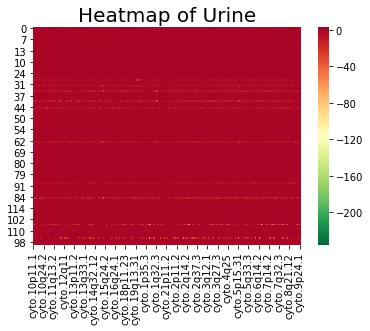

In [62]:
ax = sns.heatmap(urine.drop(['y','cyto.13q11'],axis=1), cmap='RdYlGn_r')
plt.title('Heatmap of Urine', fontsize=20)
plt.show() 